# Author : Vishnu Kumar D.S

## EY GDS - AICTE 6-WEEK INTERNSHIP
#### Data Analysis  - HealthCare Prediction on Diabetic Patient using Python

In [ ]:
# Inport Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Import Dataset 

In [15]:
data = pd.read_csv('diabetes.csv')

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### About Dataset 
Pregnancies,Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
DiabetesPedigreeFunction,
Age,
Outcome

In [17]:
# Describing Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# Check the Columns present in our Dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
# ChecK the Shape of Dataset
data.shape

(768, 9)

In [22]:
#Check if null values are present
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [23]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
# Check the duplicate Values
data.duplicated().sum()

0

### From the Observation we can see that There is no null Values and Duplicate Values to handle

In [39]:
# Now check the rows which has 0 in all.
data["Glucose"][data["Glucose"]==0]

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [38]:
print("Glucose has ",len(data["Glucose"][data["Glucose"]==0]),"Zero Values")
print("BloodPressure has ",len(data["BloodPressure"][data["BloodPressure"]==0]),"Zero Values")
print("SkinThickness has ",len(data["SkinThickness"][data["SkinThickness"]==0]),"Zero Values")
print("Insulin has",len(data["Insulin"][data["Insulin"]==0]),"Zero Values")

Glucose has  5 Zero Values
BloodPressure has  35 Zero Values
SkinThickness has  227 Zero Values
Insulin has 374 Zero Values


#### NOW WE Should Handle the Missing data 0
#### There are Many way to fill 0 with 
# Imputation Missing Values
### MEAN VALUE IMPUTATION
### MEDIAN VALUE IMPUTATION 
### MODE VALUE IMPUTATION

In [41]:
# Here From the data we can handle 0 by Mean()

In [42]:
# Finding the Mean of all

print(data["Glucose"].mean())
print(data["BloodPressure"].mean())
print(data["SkinThickness"].mean())
print(data["Insulin"].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [43]:
# We got to Know all Mean So,We replace 0 with Mean
# Replacing the null values with the Mean
data["Glucose"]=data["Glucose"].replace([0],[data["Glucose"].mean()])
data["BloodPressure"]=data["BloodPressure"].replace([0],[data["BloodPressure"].mean()])
data["SkinThickness"]=data["SkinThickness"].replace([0],[data["SkinThickness"].mean()])
data["Insulin"]=data["Insulin"].replace([0],[data["Insulin"].mean()])

In [45]:
data[data["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# We there is no 0 Values now we replaced all.

In [46]:
len(data[data["SkinThickness"]==0])

0

In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [50]:
# After Handling Missing VALUES

In [52]:
# Finding the null Value Percentage

selected_columns = ['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage =(data[selected_columns]== 0).mean()*100

In [54]:
print("Percentage is :\n",null_percentage)

Percentage is :
 Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [51]:
# Detect the Outliers

In [55]:
columns=data[selected_columns]

In [56]:
columns

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
4,137.0,40.0,35.000000,168.000000
...,...,...,...,...
763,101.0,76.0,48.000000,180.000000
764,122.0,70.0,27.000000,79.799479
765,121.0,72.0,23.000000,112.000000
766,126.0,60.0,20.536458,79.799479


In [57]:
type(columns)

pandas.core.frame.DataFrame

In [58]:
columns.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'], dtype='object')

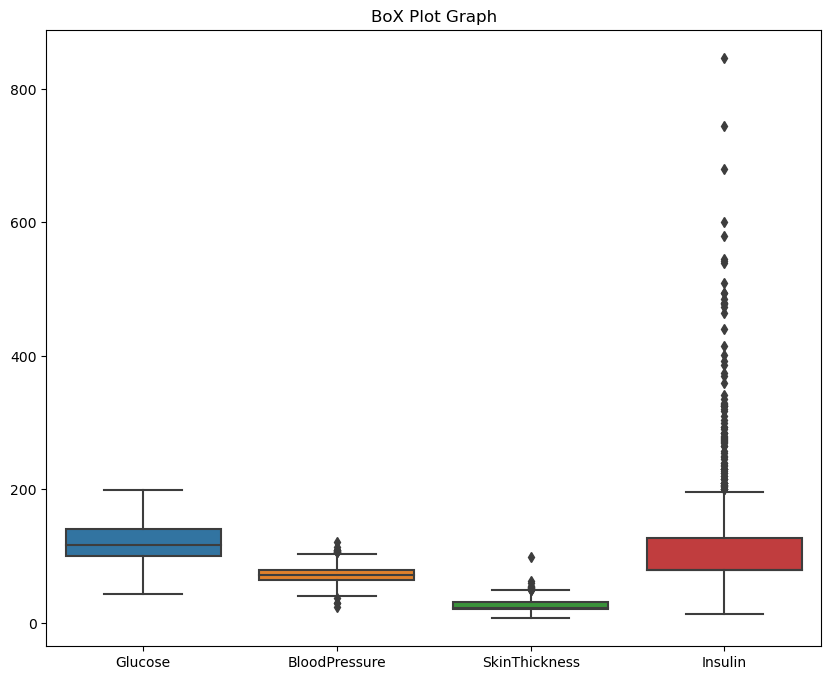

In [62]:
# Visualize Outliers
plt.figure(figsize = (10,8))
sns.boxplot(data=columns)
plt.title("BoX Plot Graph")
plt.show()

# Five-number summary is Method to handle Outliers

#Declearing Minimum,Q1-(25th Percentile),Median-(50th Percentile),Q3-(75th Percentile),Maximum

In [76]:
# minimum,Q1,median,Q3,maximum
def find_outliers(data,col_num):
    Q1 = data[col_num].quantile(0.25)
    Q3 = data[col_num].quantile(0.75)
#Calculate Interquantile Range(IQR)
    IQR = Q3 - Q1
# lower_fence and Upper_fence
    lower_fence =Q1-1.5*IQR
    upper_fence =Q3+1.5*IQR
    
## Finding Outliers
    outliers =data[(data[col_num]< lower_fence)|(data[col_num]> upper_fence)]
    
# Count the number of Outliers
    count_Outliers = len(outliers)
    
    return count_Outliers

# Calculate the no of outliers from each

for col_num in selected_columns:
    outlier_count = find_outliers(data, col_num)
    print(f"Number of Outliers in '{col_num}' column: {outlier_count}")

Number of Outliers in 'Glucose' column: 0
Number of Outliers in 'BloodPressure' column: 14
Number of Outliers in 'SkinThickness' column: 12
Number of Outliers in 'Insulin' column: 89


In [74]:
print(IQR)

1.0


In [77]:
print(lower_fence)
print(upper_fence)

-1.5
2.5


In [75]:
print(outliers)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
